# Import Libs

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Seaborn Theme
sns.set_theme(style='darkgrid')
sns.set(font_scale=1.2)

# Data exploration

In [85]:
# Read Database
DatasetURL = 'https://raw.githubusercontent.com/lucasjmorgado/python/main/DataAnalysis/Projects/Datasets/Startups%2Bin%2B2021%2Bend.csv'
Database = pd.read_csv(DatasetURL)

In [86]:
# Checking data
Database.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [87]:
# Checking data
Database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


---
We see here the necessity to transform the Dtype of the columns 'Valuation ($B)' to float and 'Date Joined' to date

---

In [88]:
# Cleaning column name
Database = Database.rename(columns={'Valuation ($B)': 'Valuation_Billions', 'Date Joined': 'Date_Joined', 'Select Investors':'Select_Investors'})
#Cleaning the values of valuation
Database['Valuation_Billions'] = pd.to_numeric( Database['Valuation_Billions'].apply( lambda line: line.replace('$', '') ) )

Database.head()

,Unnamed: 0,Company,Valuation_Billions,Date_Joined,Country,City,Industry,Select_Investors
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [89]:
# Date_Joined Conversion to date
Database['Date_Joined'] = pd.to_datetime( Database['Date_Joined'] )
Database['Date_Joined'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Date_Joined, dtype: datetime64[ns]

In [90]:
# Null Fields
Database.isnull().sum()

Unnamed: 0             0
Company                0
Valuation_Billions     0
Date_Joined            0
Country                0
City                  15
Industry               0
Select_Investors       1
dtype: int64

In [91]:
# Unique Fields
Database.nunique()

Unnamed: 0            936
Company               935
Valuation_Billions    192
Date_Joined           589
Country                47
City                  239
Industry               17
Select_Investors      920
dtype: int64

### Industry Analysis

In [92]:
# Exploring the Industry Types
Database['Industry'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [93]:
# Quantity of Industry Types
Database['Industry'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Industry, dtype: int64

In [94]:
# Percentage of Industry Types
Database['Industry'].value_counts(normalize=True)*100

Fintech                                20.299145
Internet software & services           17.841880
E-commerce & direct-to-consumer        10.897436
Artificial intelligence                 7.371795
Health                                  6.730769
Supply chain, logistics, & delivery     5.448718
Other                                   5.448718
Cybersecurity                           4.380342
Mobile & telecommunications             3.952991
Data management & analytics             3.846154
Hardware                                3.418803
Auto & transportation                   3.098291
Edtech                                  2.884615
Consumer & retail                       2.457265
Travel                                  1.388889
Artificial Intelligence                 0.427350
Finttech                                0.106838
Name: Industry, dtype: float64

In [95]:
# Cleaning errors
Database['Industry'] = Database['Industry'].replace('Finttech', 'Fintech')

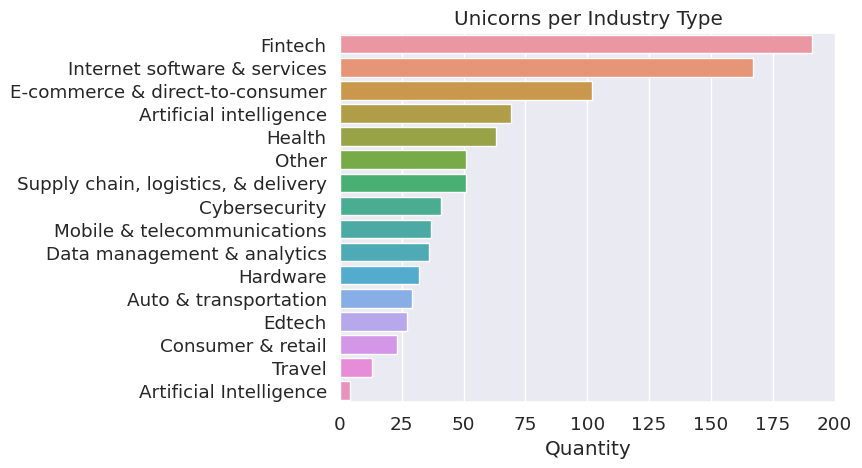

In [96]:
sns.barplot(data=Database,
            y=Database['Industry'].value_counts().index,
            x=Database['Industry'].value_counts()
            )
plt.title('Unicorns per Industry Type')
plt.xlabel('Quantity')
plt.show()

### Country Analysis

In [97]:
# Rank top 10 countries
country_counts = Database['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Values']
top_10_countries = country_counts.head(10)

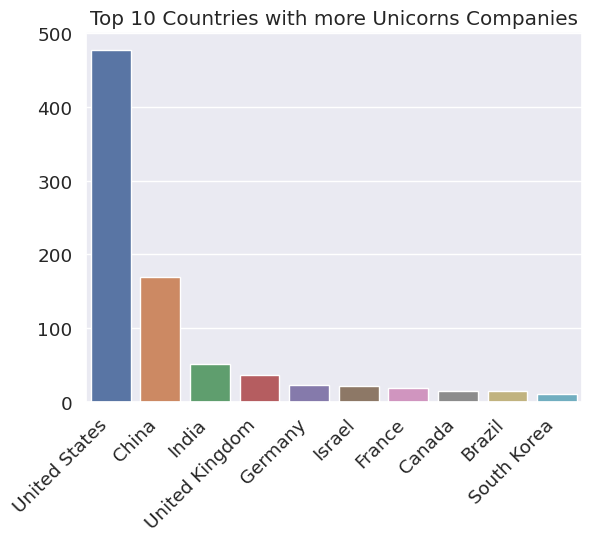

In [98]:
# Plot top 10 countries
sns.barplot(data=Database,
            x=top_10_countries['Country'],
            y=top_10_countries['Values']
            )
plt.title('Top 10 Countries with more Unicorns Companies')
plt.xticks( rotation=45, ha='right' );
plt.ylabel('')
plt.xlabel('')
plt.show()

### Adding date columns

In [99]:
# Extrair o Ano e Mes
Database['Year'] = pd.DatetimeIndex( Database['Date_Joined'] ).year
Database['Month'] = pd.DatetimeIndex( Database['Date_Joined'] ).month

Database

,Unnamed: 0,Company,Valuation_Billions,Date_Joined,Country,City,Industry,Select_Investors,Year,Month
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,4
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,12
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,1
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011,12
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,1
...,...,...,...,...,...,...,...,...,...,...
931,931,YipitData,1.0,2021-12-06,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ...",2021,12
932,932,Anyscale,1.0,2021-12-07,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation...",2021,12
933,933,Iodine Software,1.0,2021-12-01,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S...",2021,12
934,934,ReliaQuest,1.0,2021-12-01,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures",2021,12


### Checking startup values per country


In [114]:
# Cleaning errors
# Replace special characters
Value_Analysis['Country'] = Value_Analysis['Country'].str.replace(r'[^\w\s]', '', regex=True)

#Grouping
Value_Analysis = Database.groupby( by=['Country'] ).sum(numeric_only=True)['Valuation_Billions'].reset_index()
Value_Analysis = Value_Analysis.sort_values('Valuation_Billions', ascending=False)



Value_Analysis.head()

,Country,Valuation_Billions
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


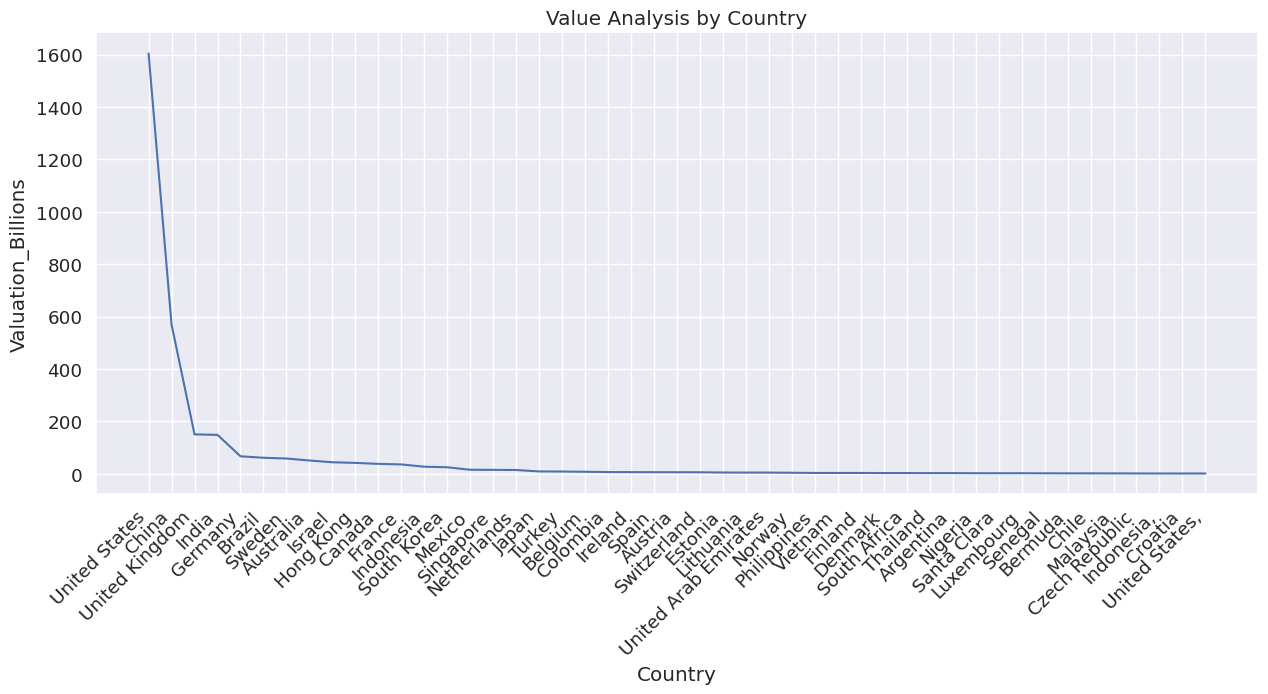

In [115]:
# Plotting
plt.figure(figsize=(15, 6))
sns.lineplot(x='Country', y='Valuation_Billions', data=Value_Analysis)
plt.title('Value Analysis by Country')
plt.xticks(rotation=45, ha='right')
plt.show()